<a href="https://www.kaggle.com/code/shoaibrkhan/data-expedition-movies?scriptVersionId=142206873" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

import seaborn as sns
import re

import warnings

warnings.filterwarnings("ignore")


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/movies-dataset-for-feature-extracion-prediction/movies.csv


In [2]:
movies = pd.read_csv("/kaggle/input/movies-dataset-for-feature-extracion-prediction/movies.csv")
df = pd.DataFrame(movies)
print(movies.shape)
movies.head()

(9999, 9)


,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN


In [3]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MOVIES    9999 non-null   object 
 1   YEAR      9355 non-null   object 
 2   GENRE     9919 non-null   object 
 3   RATING    8179 non-null   float64
 4   ONE-LINE  9999 non-null   object 
 5   STARS     9999 non-null   object 
 6   VOTES     8179 non-null   object 
 7   RunTime   7041 non-null   float64
 8   Gross     460 non-null    object 
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [4]:
movies.isnull().sum()

MOVIES         0
YEAR         644
GENRE         80
RATING      1820
ONE-LINE       0
STARS          0
VOTES       1820
RunTime     2958
Gross       9539
dtype: int64

# EDA

In [5]:
# As we can see the Gross column only have 460 non null values from 9539
df.drop('Gross', axis=1, inplace=True)

### Check For Duplicate Movies

In [6]:
duplicateData = df[df.duplicated(keep=False)]
duplicateData

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime
6830,Mighty Little Bheem,(2019– ),"\nAnimation, Short, Adventure",9.0,\nAdd a Plot\n,"\n Directors:\nRajiv Chilaka, \nKrishna Moh...",6,NaN
6832,Mighty Little Bheem,(2019– ),"\nAnimation, Short, Adventure",NaN,\nAdd a Plot\n,"\n Directors:\nRajiv Chilaka, \nKrishna Moh...",NaN,NaN
6833,Mighty Little Bheem,(2019– ),"\nAnimation, Short, Adventure",NaN,\nAdd a Plot\n,"\n Directors:\nRajiv Chilaka, \nKrishna Moh...",NaN,NaN
6835,Mighty Little Bheem,(2019– ),"\nAnimation, Short, Adventure",9.0,\nAdd a Plot\n,"\n Directors:\nRajiv Chilaka, \nKrishna Moh...",6,NaN
6836,Mighty Little Bheem,(2019– ),"\nAnimation, Short, Adventure",9.0,\nAdd a Plot\n,"\n Directors:\nRajiv Chilaka, \nKrishna Moh...",6,NaN
...,...,...,...,...,...,...,...,...
9989,1899,(2022– ),"\nDrama, History, Horror",NaN,\nAdd a Plot\n,\n Director:\nBaran bo Odar\n,NaN,NaN
9990,1899,(2022– ),"\nDrama, History, Horror",NaN,\nAdd a Plot\n,\n Director:\nBaran bo Odar\n,NaN,NaN
9991,1899,(2022– ),"\nDrama, History, Horror",NaN,\nAdd a Plot\n,\n Director:\nBaran bo Odar\n,NaN,NaN
9992,1899,(2022– ),"\nDrama, History, Horror",NaN,\nAdd a Plot\n,\n Director:\nBaran bo Odar\n,NaN,NaN


In [7]:
duplicateData['MOVIES'].unique()

array([' Mighty Little Bheem', ' The Pentaverate', ' Bojwagwan',
       ' The Sandman', ' Midnight Mass', ' Russian Doll',
       ' Stranger Things', ' Living Undocumented', ' Scams',
       ' Inventing Anna', ' Disenchantment', ' Brand New Cherry Flavor',
       ' The Witcher', ' One Piece', ' Siempre Bruja', ' On the Verge',
       ' Hyena', ' The Chair', ' Painkiller', ' Clickbait', ' Buddi',
       ' In from the Cold', ' Rádio Coisa Mais Linda',
       ' Cyberpunk: Edgerunners', ' The Witcher: Blood Origin', ' Jaguar',
       ' Maid', ' Vikings: Valhalla', ' Glória', ' Clark',
       ' Power Rangers: Dino Fury', ' Lost Ollie',
       ' Feria: The Darkest Light', ' Las mágicas historias de Plim Plim',
       ' 800 metros', ' The Umbrella Academy', ' Stay Close',
       ' Archive 81', ' Unrecorded Night', ' Caïd', ' The Empress',
       ' Locke & Key', ' Anatomy of a Scandal', ' Bir Denizalti Hikayesi',
       ' Heartstopper', ' Post Mortem: No One Dies in Skarnes',
       ' Sex Educ

### Removing Duplicates

In [8]:
unique_df = df.drop_duplicates()
unique_df

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN
...,...,...,...,...,...,...,...,...
9993,Totenfrau,(2022– ),"\nDrama, Thriller",NaN,\nAdd a Plot\n,\n Director:\nNicolai Rohde\n| \n Stars:...,NaN,NaN
9995,Arcane,(2021– ),"\nAnimation, Action, Adventure",NaN,\nAdd a Plot\n,\n,NaN,NaN
9996,Heart of Invictus,(2022– ),"\nDocumentary, Sport",NaN,\nAdd a Plot\n,\n Director:\nOrlando von Einsiedel\n| \n ...,NaN,NaN
9997,The Imperfects,(2021– ),"\nAdventure, Drama, Fantasy",NaN,\nAdd a Plot\n,\n Director:\nJovanka Vuckovic\n| \n Sta...,NaN,NaN


In [9]:
# if the same movies (title) got diff ratings and votings then find the avg by them
agg_funcs = {
    'RATING': lambda x: x.fillna(0).astype(int).mean(),
    'VOTES': lambda x: x.str.replace(',', '').astype(float).fillna(0).astype(int).mean(),
}

for col in df.columns:
    if col not in agg_funcs and col != 'MOVIES':
        agg_funcs[col] = 'first'

unique_df = unique_df.groupby('MOVIES').agg(agg_funcs).reset_index()
unique_df['VOTES'] = unique_df['VOTES'].apply(lambda x: format(x, ','))

unique_df

,MOVIES,RATING,VOTES,YEAR,GENRE,ONE-LINE,STARS,RunTime
0,13 Reasons Why,5.600000,"1,693.6",(2017–2020),"\nDrama, Mystery, Thriller","\nThe police question Tyler about the guns, le...",\n Director:\nRussell Mulcahy\n| \n Star...,59.0
1,1899,0.000000,0.0,(2022– ),"\nDrama, History, Horror",\nAdd a Plot\n,\n Director:\nBaran bo Odar\n| \n Stars:...,NaN
2,3Below: Tales of Arcadia,7.500000,129.5,(2018–2019),"\nAnimation, Action, Adventure","\nLeft vulnerable after Omen's attack, the roy...",\n Director:\nAndrew L. Schmidt\n| \n St...,22.0
3,50M2,6.875000,119.5,(2021– ),"\nComedy, Drama, Thriller","\nWhile seeking answers about his parents, Sha...",\n Director:\nSelçuk Aydemir\n| \n Stars...,51.0
4,7Seeds,6.521739,30.52173913043478,(2019–2020),"\nAnimation, Action, Adventure","\nConvinced that Botan has kidnapped them, Nat...","\n \n Stars:\nMorgan Berry, \nAm...",24.0
...,...,...,...,...,...,...,...,...
6812,Ófærð,8.000000,"17,309.0",(2015– ),"\nCrime, Drama, Mystery","\nIn a remote town in Iceland, Police desperat...",\n \n Stars:\nÓlafur Darri Ólafs...,60.0
6813,Órbita 9,5.000000,"7,123.0",(2017),"\nDrama, Romance, Sci-Fi",\nHelena is a young girl who spent all her lif...,\n Director:\nHatem Khraiche\n| \n Stars...,95.0
6814,Ôkami to kôshinryô,8.000000,"3,959.0",(2008–2009),"\nAnimation, Adventure, Fantasy",\nKraft Lawrence goes from town to town to mak...,"\n \n Stars:\nJun Fukuyama, \nAm...",24.0
6815,Öldür Beni Sevgilim,4.000000,"1,568.0",(2019),"\nComedy, Romance",\nCan the excitement of the national lottery s...,\n Director:\nSenol Sönmez\n| \n Stars:\...,104.0


In [10]:
# checking duplicate again
duplicateDataInUnique = unique_df[unique_df.duplicated(keep=False)]
duplicateDataInUnique

,MOVIES,RATING,VOTES,YEAR,GENRE,ONE-LINE,STARS,RunTime


In [11]:
unique_df.isnull().sum()

MOVIES         0
RATING         0
VOTES          0
YEAR         462
GENRE         71
ONE-LINE       0
STARS          0
RunTime     1502
dtype: int64

### Highest Rating

In [12]:
top_10_movies = unique_df.sort_values(by='RATING', ascending=False).head(10)
# top_10_movies = unique_df.nlargest(10, 'RATING')
top_10_movies

,MOVIES,RATING,VOTES,YEAR,GENRE,ONE-LINE,STARS,RunTime
1225,Breaking Bad,9.0,"1,552,311.0",(2008–2013),"\nCrime, Drama, Thriller",\nA high school chemistry teacher diagnosed wi...,"\n \n Stars:\nBryan Cranston, \n...",49.0
6658,Word of Honor,9.0,"2,166.0",(2021– ),"\nAction, Drama, Fantasy",\nZhou Zi Shu gets embroiled in a conspiracy i...,"\n \n Stars:\nJun Gong, \nZhehan...",45.0
2054,Eung-dab-ha-ra 1988,9.0,"4,663.0",(2015–2016),"\nComedy, Drama, Family",\nFollows the lives of 5 families living on th...,"\n \n Stars:\nHyeri Lee, \nGo Ky...",90.0
4621,Rick and Morty,9.0,"414,849.0",(2013– ),"\nAnimation, Adventure, Comedy",\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...",23.0
4261,Our Planet,9.0,"36,473.0",(2019),\nDocumentary,\nDocumentary series focusing on the breadth o...,\n \n Star:\nDavid Attenborough\n,403.0
1667,David Attenborough: A Life on Our Planet,9.0,"28,445.0",(2020),"\nDocumentary, Biography",\nOne man has seen more of the natural world t...,"\n Directors:\nAlastair Fothergill, \nJonat...",83.0
1533,Cosmos: A Spacetime Odyssey,9.0,"114,386.0",(2014),\nDocumentary,\nAn exploration of our discovery of the laws ...,\n \n Stars:\nNeil deGrasse Tyso...,557.0
19,Anne,9.0,"1,624.6666666666667",(2017–2019),"\nDrama, Family",\nAnne's search takes her back to the orphanag...,\n Director:\nKim Nguyen\n| \n Stars:\nA...,44.0
4058,Naui Ajusshi,9.0,"3,944.0",(2018),"\nDrama, Family",\nA man in his 40's withstands the weight of l...,"\n \n Stars:\nSun-kyun Lee, \nJi...",70.0
3456,Leyla ile Mecnun,9.0,"90,655.0",(2011–2021),"\nAdventure, Comedy, Drama",\nTurkish television comedy series set in Ista...,"\n \n Stars:\nAli Atay, \nAhmet ...",80.0


### Most Votes on Movies

In [13]:
new_df = unique_df.copy()
new_df['VOTES'] = new_df['VOTES'].str.replace(',', '').astype(float)
top_n_rows = new_df.nlargest(10, 'VOTES')
top_n_rows['VOTES'] = new_df['VOTES'].apply(lambda x: format(x, ','))
top_n_rows

,MOVIES,RATING,VOTES,YEAR,GENRE,ONE-LINE,STARS,RunTime
5765,The Lord of the Rings: The Fellowship of the Ring,8.0,"1,713,028.0",(2001),"\nAction, Adventure, Drama",\nA meek Hobbit from the Shire and eight compa...,\n Director:\nPeter Jackson\n| \n Stars:...,178.0
5766,The Lord of the Rings: The Return of the King,8.0,"1,691,777.0",(2003),"\nAction, Adventure, Drama",\nGandalf and Aragorn lead the World of Men ag...,\n Director:\nPeter Jackson\n| \n Stars:...,201.0
1225,Breaking Bad,9.0,"1,552,311.0",(2008–2013),"\nCrime, Drama, Thriller",\nA high school chemistry teacher diagnosed wi...,"\n \n Stars:\nBryan Cranston, \n...",49.0
5767,The Lord of the Rings: The Two Towers,8.0,"1,529,752.0",(2002),"\nAction, Adventure, Drama",\nWhile Frodo and Sam edge closer to Mordor wi...,\n Director:\nPeter Jackson\n| \n Stars:...,179.0
5535,The Departed,8.0,"1,227,522.0",(2006),"\nCrime, Drama, Thriller",\nAn undercover cop and a mole in the police a...,\n Director:\nMartin Scorsese\n| \n Star...,151.0
3197,Kill Bill: Vol. 1,8.0,"1,034,554.0",(2003),"\nAction, Crime, Drama","\nAfter awakening from a four-year coma, a for...",\n Director:\nQuentin Tarantino\n| \n St...,111.0
3106,Jurassic Park,8.0,"897,444.0",(1993),"\nAction, Adventure, Sci-Fi",\nA pragmatic paleontologist visiting an almos...,\n Director:\nSteven Spielberg\n| \n Sta...,127.0
2426,Gone Girl,8.0,"895,888.0",(2014),"\nDrama, Mystery, Thriller",\nWith his wife's disappearance having become ...,\n Director:\nDavid Fincher\n| \n Stars:...,149.0
5191,Stranger Things,8.0,"885,856.0",(2016– ),"\nDrama, Fantasy, Horror","\nWhen a young boy disappears, his mother, a p...",\n \n Stars:\nMillie Bobby Brown...,51.0
6022,The Walking Dead,8.0,"885,805.0",(2010–2022),"\nDrama, Horror, Thriller",\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...",44.0


## Finding Most Rated Movies By Year

In [14]:
#movies data have NaN values on years so what we are doing now is to excluding data for that
unique_df.dropna(subset=['YEAR'], inplace=True)
unique_df

,MOVIES,RATING,VOTES,YEAR,GENRE,ONE-LINE,STARS,RunTime
0,13 Reasons Why,5.600000,"1,693.6",(2017–2020),"\nDrama, Mystery, Thriller","\nThe police question Tyler about the guns, le...",\n Director:\nRussell Mulcahy\n| \n Star...,59.0
1,1899,0.000000,0.0,(2022– ),"\nDrama, History, Horror",\nAdd a Plot\n,\n Director:\nBaran bo Odar\n| \n Stars:...,NaN
2,3Below: Tales of Arcadia,7.500000,129.5,(2018–2019),"\nAnimation, Action, Adventure","\nLeft vulnerable after Omen's attack, the roy...",\n Director:\nAndrew L. Schmidt\n| \n St...,22.0
3,50M2,6.875000,119.5,(2021– ),"\nComedy, Drama, Thriller","\nWhile seeking answers about his parents, Sha...",\n Director:\nSelçuk Aydemir\n| \n Stars...,51.0
4,7Seeds,6.521739,30.52173913043478,(2019–2020),"\nAnimation, Action, Adventure","\nConvinced that Botan has kidnapped them, Nat...","\n \n Stars:\nMorgan Berry, \nAm...",24.0
...,...,...,...,...,...,...,...,...
6812,Ófærð,8.000000,"17,309.0",(2015– ),"\nCrime, Drama, Mystery","\nIn a remote town in Iceland, Police desperat...",\n \n Stars:\nÓlafur Darri Ólafs...,60.0
6813,Órbita 9,5.000000,"7,123.0",(2017),"\nDrama, Romance, Sci-Fi",\nHelena is a young girl who spent all her lif...,\n Director:\nHatem Khraiche\n| \n Stars...,95.0
6814,Ôkami to kôshinryô,8.000000,"3,959.0",(2008–2009),"\nAnimation, Adventure, Fantasy",\nKraft Lawrence goes from town to town to mak...,"\n \n Stars:\nJun Fukuyama, \nAm...",24.0
6815,Öldür Beni Sevgilim,4.000000,"1,568.0",(2019),"\nComedy, Romance",\nCan the excitement of the national lottery s...,\n Director:\nSenol Sönmez\n| \n Stars:\...,104.0


In [15]:
unique_df.isnull().sum()

MOVIES         0
RATING         0
VOTES          0
YEAR           0
GENRE         34
ONE-LINE       0
STARS          0
RunTime     1059
dtype: int64

In [16]:
specific_year_data = unique_df[unique_df['YEAR'] == "(2020)"].sort_values(by='RATING', ascending=False).head(10)
specific_year_data

,MOVIES,RATING,VOTES,YEAR,GENRE,ONE-LINE,STARS,RunTime
5736,The Last Dance,9.000000,"93,041.0",(2020),"\nDocumentary, Biography, History",\nCharting the rise of the 1990's Chicago Bull...,"\n \n Stars:\nPhil Jackson, \nMi...",491.0
1667,David Attenborough: A Life on Our Planet,9.000000,"28,445.0",(2020),"\nDocumentary, Biography",\nOne man has seen more of the natural world t...,"\n Directors:\nAlastair Fothergill, \nJonat...",83.0
342,The Queen's Gambit,8.142857,"8,478.0",(2020),\nDrama,"\nSent to an orphanage at age 9, Beth develops...",\n Director:\nScott Frank\n| \n Stars:\n...,59.0
397,Wizards,8.100000,155.0,(2020),"\nAnimation, Action, Adventure","\nAfter pushing a broom for centuries, Merlin'...","\n Directors:\nDouglas Shorts, \nFrancisco ...",24.0
299,Teenage Bounty Hunters,8.100000,728.4,(2020),"\nComedy, Crime, Drama",\nSterling and Blair seem perfect little angel...,\n Director:\nJesse Peretz\n| \n Stars:\...,NaN
6344,Unorthodox,8.000000,"65,121.0",(2020),\nDrama,\nStory of a young ultra-Orthodox Jewish woman...,"\n \n Stars:\nShira Haas, \nAmit...",53.0
3436,Lenox Hill,8.000000,"2,044.0",(2020),\nDocumentary,\nAn intimate look at the lives of four doctor...,"\n \n Stars:\nJohn Boockvar, \nD...",NaN
2010,Emicida: AmarElo - It's All for Yesterday,8.000000,"1,178.0",(2020),"\nDocumentary, Music",\nBetween scenes from his concert in São Paulo...,\n Director:\nFred Ouro Preto\n| \n Star...,89.0
5014,Sky Tour: The Movie,8.000000,996.0,(2020),"\nDocumentary, Music","\nFrom the preparations to the performances, t...",\n Director:\nSon Tung Mtp\n| \n Star:\n...,94.0
3226,Kiss the Ground,8.000000,"5,736.0",(2020),\nDocumentary,"\nA revolutionary group of activists, scientis...","\n Directors:\nJoshua Tickell, \nRebecca Ha...",84.0


## Data Visualization

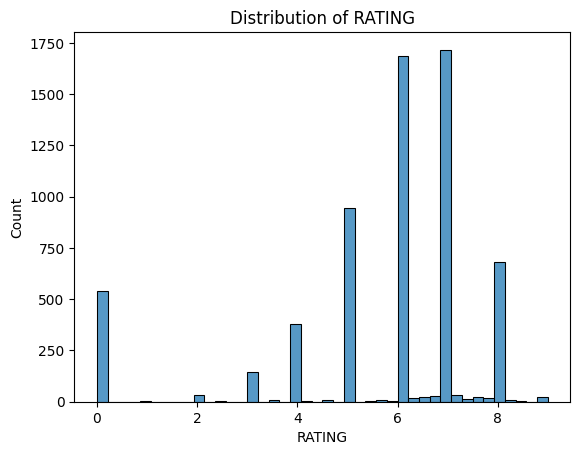

In [17]:
sns.histplot(unique_df['RATING'])
plt.xlabel('RATING')
plt.title('Distribution of RATING')
plt.show()

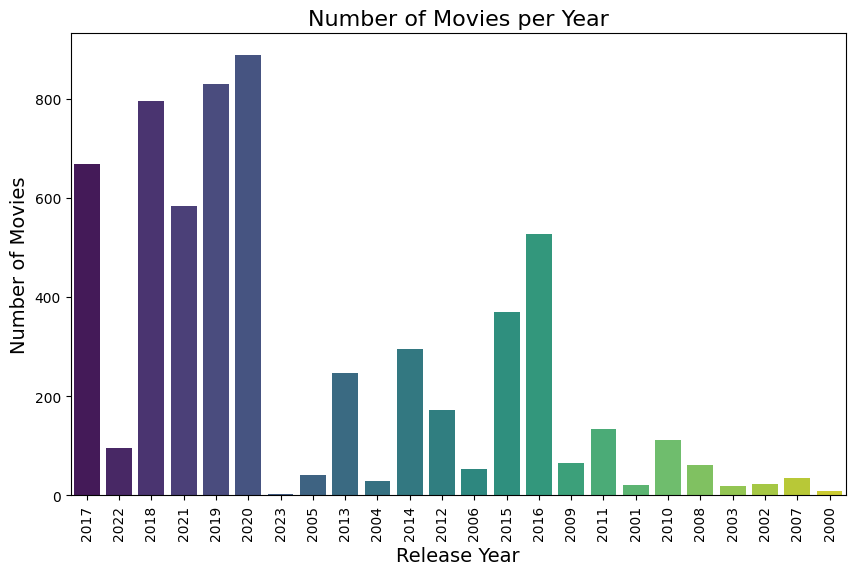

In [18]:
df_year = unique_df.copy()
df_year['RELEASE_YEAR_START'] = df_year['YEAR'].str.extract(r'(\d{4})')[0]
df_year['RELEASE_YEAR_END'] = df_year['YEAR'].str.extract(r'(\d{4})–(\d{4})')[1]

# Fill NaN values in RELEASE_YEAR_START and RELEASE_YEAR_END with '0' (for movies with single years)
df_year['RELEASE_YEAR_START'].fillna('0', inplace=True)
df_year['RELEASE_YEAR_END'].fillna('0', inplace=True)

# Filter out rows with release years before 2000 or after 2023
df_year = df_year[(df_year['RELEASE_YEAR_START'].astype(int) >= 2000) & (df_year['RELEASE_YEAR_END'].astype(int) <= 2023)]

# Create a countplot to show the distribution of movies per year
plt.figure(figsize=(10, 6))  # Set the figure size (optional)
sns.countplot(data=df_year, x='RELEASE_YEAR_START', palette='viridis')  # Use 'viridis' color palette (optional)
plt.title('Number of Movies per Year', fontsize=16)  # Set the plot title (optional)
plt.xlabel('Release Year', fontsize=14)  # Set the x-axis label (optional)
plt.ylabel('Number of Movies', fontsize=14)  # Set the y-axis label (optional)
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility (optional)
plt.show()

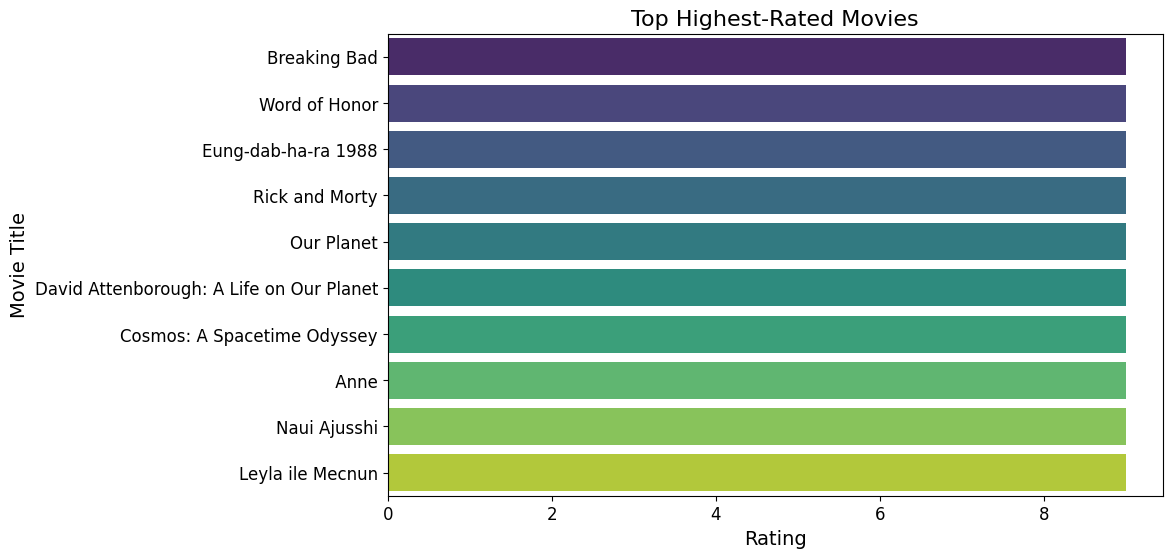

In [19]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_movies, x='RATING', y='MOVIES', palette='viridis')
plt.title(f'Top Highest-Rated Movies', fontsize=16)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Movie Title', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

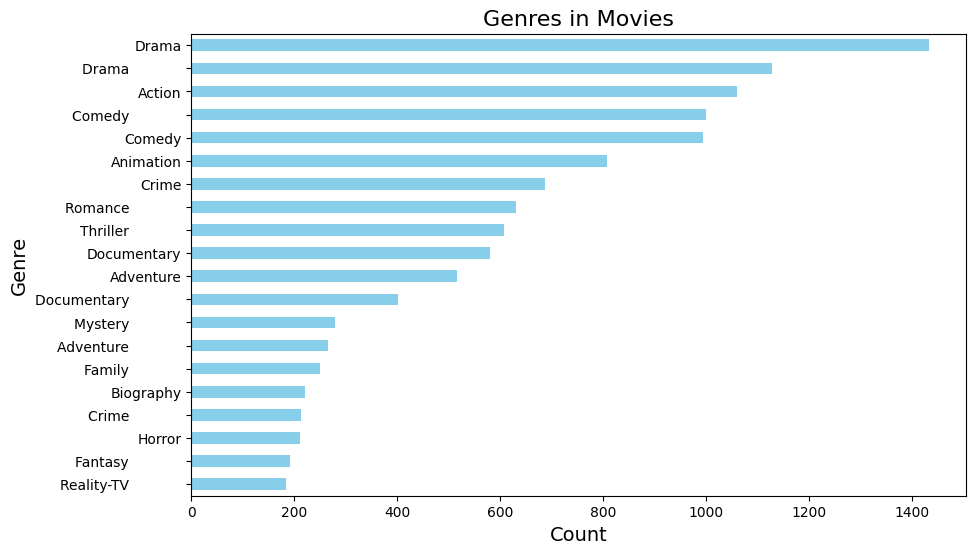

In [20]:
genre_df = unique_df.copy()
genre_df['GENRE'] = genre_df['GENRE'].astype(str)

genre_df['GENRE'] = genre_df['GENRE'].str.strip('\n').str.split(', ')

# Flatten the list of genres
genres_list = [genre for genres in genre_df['GENRE'] for genre in genres]

genre_counts = pd.Series(genres_list).value_counts().head(20)

plt.figure(figsize=(10, 6))  # Set the figure size (optional)
genre_counts.plot(kind='barh', color='skyblue')
plt.title('Genres in Movies', fontsize=16)  # Set the plot title (optional)
plt.xlabel('Count', fontsize=14)  # Set the x-axis label (optional)
plt.ylabel('Genre', fontsize=14)  # Set the y-axis label (optional)
plt.gca().invert_yaxis()  # Invert the y-axis to display the most common genre at the top
plt.show()

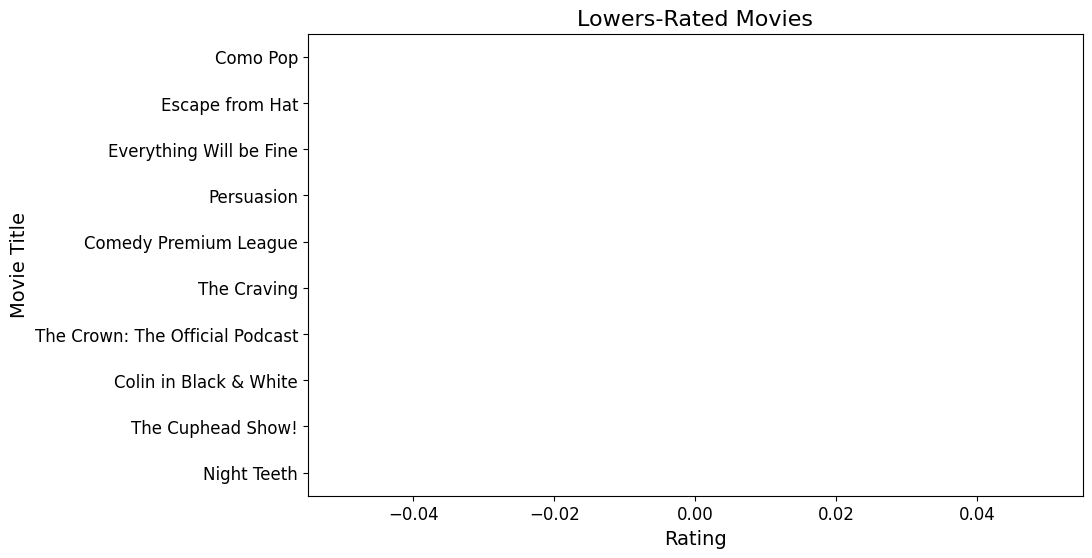

In [21]:
top_10_low_movies = unique_df.sort_values(by='RATING', ascending=False).tail(10)
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_low_movies, x='RATING', y='MOVIES', palette='viridis')
plt.title(f'Lowers-Rated Movies', fontsize=16)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Movie Title', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()
# we can see there are outliers for movies, some ratings are in negatives, so we will remove them later

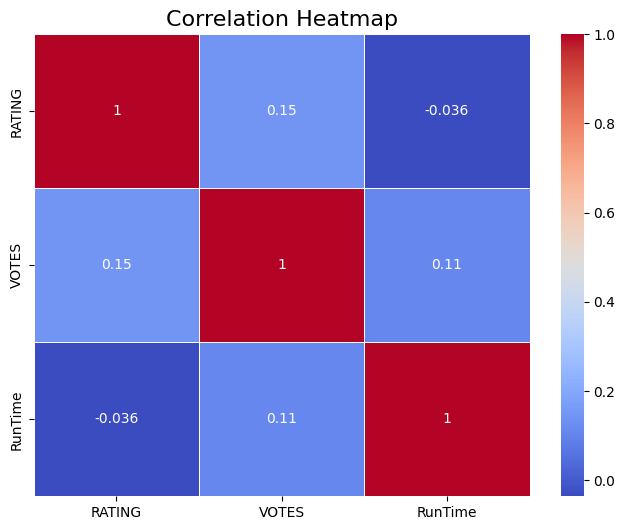

In [22]:
numeric_df = df_year[['RATING', 'VOTES', 'RunTime']]
numeric_df['VOTES'] = numeric_df['VOTES'].str.replace(',', '').astype(float)
correlation_matrix = numeric_df.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(8, 6))  # Set the figure size (optional)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16)  # Set the plot title (optional)
plt.show()